In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import import_ipynb
import Classes

from warnings import filterwarnings
filterwarnings('ignore')

importing Jupyter notebook from Classes.ipynb


C:\Users\Asiye\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
data = pd.read_excel("HW_Data_Set.xlsx")

In [3]:
information = Classes.Information(data)
information.data_features()

--------------------------  DATA HEAD --------------------------

   ind_5  ind_6  ind_8      ind_9     ind_10     ind_12     ind_13  ind_14  \
0     19     17  100.0  85.714286  14.285714  72.363515  60.808814   23.80   
1     24     19  100.0  78.571429  21.428571  74.275883  64.366798   11.45   
2     30     24  100.0  71.428571  28.571429  75.140402  65.915803    8.75   
3     37     30  100.0  64.285714  35.714286  76.677846  68.584234    7.80   
4     41     37  100.0  57.142857  42.857143  81.603007  76.455495   14.90   

   ind_15  ind_16  ...  ind_416  ind_418  ind_420  ind_422  ind_424   ind_426  \
0   17.62   11.73  ...    -49.6      -54     -152     -353      1.0  0.498547   
1   18.16   12.22  ...    -55.6      -60     -158     -359      1.0  0.537088   
2   17.86   12.28  ...    -58.4      -60     -160     -362      1.0  0.615169   
3   14.76   12.61  ...    -61.8      -65     -166     -367      1.0  0.661517   
4   11.92   14.25  ...    -79.8      -86     -186     -388  

In [4]:
p = Classes.Preprocess(data)
p.get_missing_values()

------------  Missing Values  -------------


90_target    0
ind_51       0
ind_62       0
ind_61       0
ind_58       0
            ..
ind_311      0
ind_313      0
ind_315      0
ind_316      0
ind_5        0
Length: 136, dtype: int64

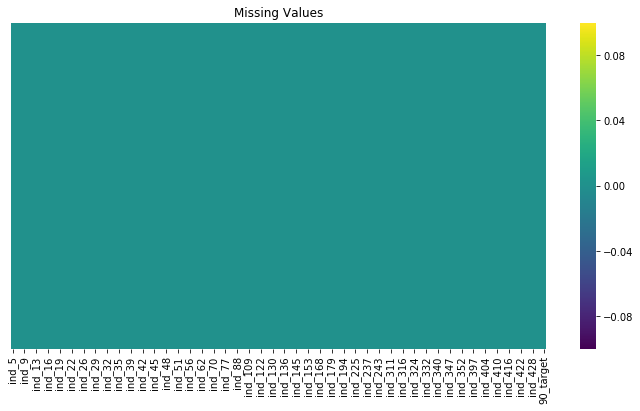

In [5]:
v = Classes.Visualizer()
v.missing_values(data)

In [6]:
data = data[data['ind_420'] != '?']
data = data[data['ind_422'] != '?']

#dummy

RED = pd.get_dummies(data['ind_109'], drop_first =True)
data=pd.concat([data,RED],axis=1)
data.drop(['ind_109'],axis =1,inplace=True)

In [7]:
X = data.iloc[:, 0:132]
y = data.loc[:, data.columns == '20_target']

In [8]:
cate =X.select_dtypes(include='object')
cate

,ind_420,ind_422
0,-152,-353
1,-158,-359
2,-160,-362
3,-166,-367
4,-186,-388
...,...,...
6162,-11,-270
6163,-12,-271
6164,-21,-280
6165,-33,-292


In [9]:
X.astype('float64').dtypes

ind_5      float64
ind_6      float64
ind_8      float64
ind_9      float64
ind_10     float64
            ...   
ind_420    float64
ind_422    float64
ind_424    float64
ind_426    float64
ind_428    float64
Length: 132, dtype: object

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [11]:
from sklearn.decomposition import PCA
pca = PCA(whiten = True)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

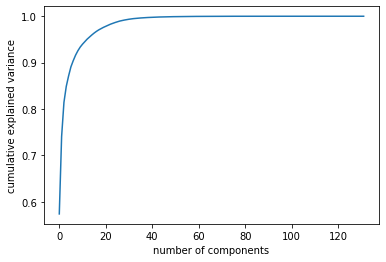

In [12]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [13]:
pca2 = PCA(n_components = 30,whiten = True)
pca2.fit(X_train)
x_pca = pca2.transform(X_train)

In [14]:
print("Variance ratio : ",pca2.explained_variance_ratio_)

Variance ratio :  [0.57391723 0.16684296 0.07352285 0.03447803 0.02251061 0.01961884
 0.01331643 0.0118239  0.00957018 0.00792338 0.00627764 0.00562108
 0.00528015 0.00455268 0.00440218 0.00411338 0.00366839 0.00322172
 0.002702   0.00266841 0.00230924 0.00227372 0.00221265 0.00191875
 0.00171034 0.00167074 0.00146655 0.00115335 0.00103255 0.00095407]


In [15]:
print("Sum : ",sum(pca2.explained_variance_ratio_))

Sum :  0.99273400667


In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() 
X_std = sc.fit_transform(X_train)
pca3 = PCA()
X_pca = pca3.fit(X_std)

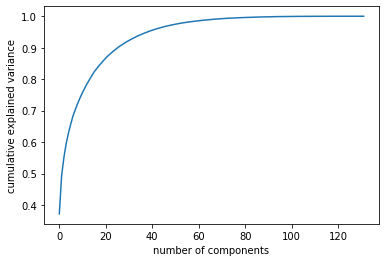

In [17]:
plt.plot(np.cumsum(pca3.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [18]:
pca3 = PCA(n_components = 30)  
X_pca = pca3.fit_transform(X_std)
print("Sum : ",sum(pca3.explained_variance_ratio_))

Sum :  0.918837788466772


In [19]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
pcr_model = lm.fit(X_pca, y_train)

In [20]:
y_pred = pcr_model.predict(X_pca)

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
np.sqrt(mean_squared_error(y_train, y_pred))

14.52790086113115